In [1]:
from clarifai.rest import ClarifaiApp
app = ClarifaiApp(api_key='f9c874a9098c4ade9ea857a4b955cee0')
      
# get the general model
model = app.models.get("general-v1.3")
      
# predict with the model
results = model.predict_by_url(url='https://samples.clarifai.com/metro-north.jpg') 

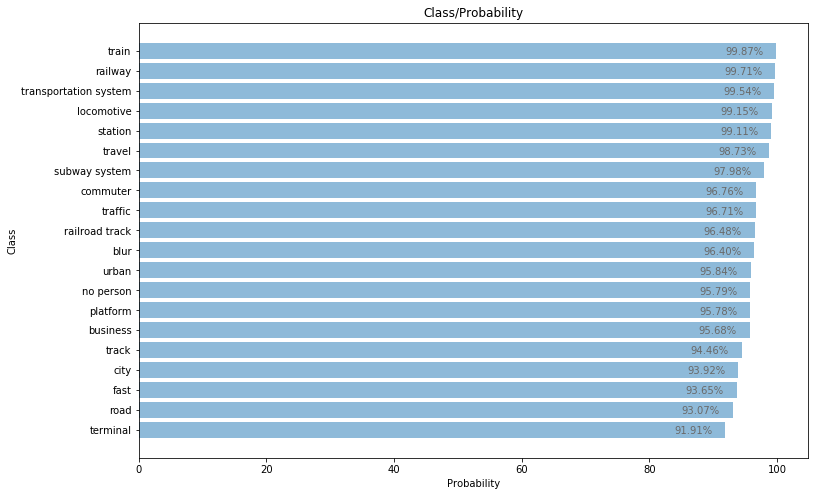

In [2]:
#import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

names = []
values = []

for concept in results['outputs'][0]['data']['concepts']:
    names.append(concept['name'])
    values.append(concept['value'] * 100)
    
y_pos = np.arange(len(names))
plt.figure(figsize=(12, 8))
ax = plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, names)
plt.xlabel('Probability')
plt.ylabel('Class')
plt.title('Class/Probability')
plt.gca().invert_yaxis()

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_y()
    x_value = rect.get_x() + rect.get_width()
       
    # Number of points between bar and label.
    spacex = rect.get_width()-5
    spacey = rect.get_y()+.45
    
    # Vertical alignment
    va = 'center'
   
    # Use X value as label and format number with two decimal place
    label = "{:.2f}%".format(x_value)
    
    # Create annotation
    plt.annotate(
        
        #str(rect.get_width()), 
        label,
        (x_value, 
        y_value), 
        xytext=(spacex, spacey), 
        #textcoords='offset points',
        ha='center',
        va=va,
        color='dimgrey')